In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-wine/wine.data


In [2]:
uci_wine_names = ['Target',
                  'Alcohol',
                  'Malic acid',
                  'Ash',
                  'Alcalinity of ash',
                  'Magnesium',
                  'Total phenols',
                  'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity',
                  'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']
uci_wine = pd.read_csv('/kaggle/input/uci-wine/wine.data', header=None, names=uci_wine_names)
uci_wine_unlabeled = uci_wine.drop('Target', axis=1)
uci_wine_unlabeled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(uci_wine_unlabeled)

KMeans(n_clusters=3)

In [4]:
#kmeans.labels_
labels = kmeans.predict(uci_wine_unlabeled)

uci_wine_labeled = uci_wine_unlabeled.copy()
uci_wine_labeled['label'] = labels

uci_wine_first = uci_wine_labeled[uci_wine_labeled['label']==0]
uci_wine_second = uci_wine_labeled[uci_wine_labeled['label']==1]
uci_wine_third = uci_wine_labeled[uci_wine_labeled['label']==2]

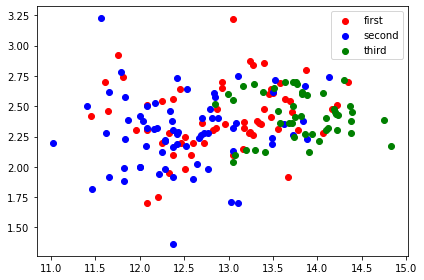

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.scatter(uci_wine_first['Alcohol'], uci_wine_first['Ash'],c='red',label='first')
ax.scatter(uci_wine_second['Alcohol'], uci_wine_second['Ash'],c='blue',label='second')
ax.scatter(uci_wine_third['Alcohol'], uci_wine_third['Ash'],c='green',label='third')
plt.legend()
plt.tight_layout()
plt.show()